In [1]:
#import necessary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Import data set from Git Hub Raw file.
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Japan_used_cars_datasets.csv')

In [3]:
# Checking top 5 rows of data set.

df.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [4]:
# Checking shape of this dataset.

df.shape

(2318, 11)

There are 2318 rows and 11 column in this data set.

In [5]:
# Checking null values in data set
df.isnull().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

There is no any null value in our data set.

# Checking some basic information about dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2318 non-null   int64 
 1   price            2318 non-null   int64 
 2   mark             2318 non-null   object
 3   model            2318 non-null   object
 4   year             2318 non-null   int64 
 5   mileage          2318 non-null   int64 
 6   engine_capacity  2318 non-null   int64 
 7   transmission     2318 non-null   object
 8   drive            2318 non-null   object
 9   hand_drive       2318 non-null   object
 10  fuel             2318 non-null   object
dtypes: int64(5), object(6)
memory usage: 199.3+ KB


In [7]:
#. there are total 11 columns in this data set.
#. price column is our target variable /lable column which is integer / continuous data so we should go with regression model.
#. id is nominal column, we can drop this column.
#. mark and model is also categorical type columns , we can drop this column.
#. Further we will check correlation between features and labels for cross check the dependency which feature is depend on label.

In [8]:
# Dealing with year column. this is useful colums to get the car age 
df['current_year']=2022
df.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel,current_year
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline,2022
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline,2022
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline,2022
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline,2022
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline,2022


In [9]:
df['No_of_yr']=df['current_year']-df['year']
df.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel,current_year,No_of_yr
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline,2022,19
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline,2022,12
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline,2022,17
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline,2022,14
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline,2022,16


In [10]:
df.drop(['year','current_year'],axis=1,inplace=True)
df.head()

,id,price,mark,model,mileage,engine_capacity,transmission,drive,hand_drive,fuel,No_of_yr
0,0,80,nissan,march,80000,1240,at,2wd,rhd,gasoline,19
1,1,110,nissan,march,53000,1200,at,2wd,rhd,gasoline,12
2,2,165,nissan,lafesta,47690,2000,at,2wd,rhd,gasoline,17
3,3,190,toyota,avensis,130661,1990,at,2wd,rhd,gasoline,14
4,4,190,daihatsu,mira,66300,660,at,2wd,rhd,gasoline,16


In [11]:
# Checking fuel type column and convert the same in continuous data.
df['fuel'].unique()

array(['gasoline', 'diesel', 'hybrid', 'lpg', 'cng'], dtype=object)

In [12]:
df['fuel']=df['fuel'].replace({'gasoline':0,'diesel':1,'hybrid':2,'lpg':3,'cng':4})
df['fuel'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [13]:
# Checking Unique Values of data set.

df['id'].unique()


array([   0,    1,    2, ..., 2333, 2334, 2335], dtype=int64)

In [14]:
df['mark'].unique()

array(['nissan', 'toyota', 'daihatsu', 'volkswagen', 'mazda', 'honda',
       'subaru', 'mercedes-benz', 'kubota', 'mitsubishi', 'suzuki', 'bmw',
       'chrysler', 'smart', 'gm', 'opel', 'isuzu', 'land rover',
       'peugeot', 'hyundai', 'kia motors', 'audi', 'citroen', 'mitsuoka',
       'volvo', 'ford', 'hino', 'jaguar'], dtype=object)

In [15]:
df['model'].unique()

array(['march', 'lafesta', 'avensis', 'mira', 'passat', 'bongo van',
       'step wgn', 'sambar', 'inspire', 'mercedes-benz others', 'note',
       'passo', 'impreza', 'kubota others', 'life', 'progres',
       'cube cubic', 'cube', 'a-class', 'coltplus', 'mr wagon',
       'pajero mini', 'fit', 'legacy b4', 'vitz', 'mark ii blit',
       'insight', 'move', 'tanto', 'terios kid', 'az-wagon', 'coo',
       'verisa', 'swift', 'delica d2', 'tiida', 'sienta', 'mini', 'colt',
       'platz', 'bluebird sylphy', 'eclipse', 'bb', 'moco',
       'clipper truck', 'esse', 'ek wagon', 'polo', 'x-trail',
       'atenza sport', 'ad van', 'pixis space', 'freed spike', 'stream',
       'alto', 'raum', 'wish', 'every', 'demio', 'jimny', 'premacy',
       'cr-v', 'lapin', 'delica', 'wagon r', 'lancer', 'naked', 'odyssey',
       'ractis', 'porte', 'corolla rumion', 'tiida latio', 'voxy',
       'carol', 'sunny', 'bongo truck', 'boon', 's-mx', 'pt cruiser',
       'golf', 'ad expert', 'fit hybrid', 'sere

In [16]:
df['transmission'].unique()

array(['at', 'mt', 'cvt'], dtype=object)

In [17]:
df['drive'].unique()

array(['2wd', '4wd', 'awd'], dtype=object)

In [18]:
df['hand_drive'].unique()

array(['rhd', 'center', 'lhd'], dtype=object)

# Dealing with Fuel Column

This is Fuel Column, we cant delete this column as the same is useful feature for this data set.

In [19]:
df['fuel'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [20]:
df['fuel']=df['fuel'].replace({'gasoline':0,'diesel':1,'hybrid':2,'lpg':3,'cng':4})

df.head()

,id,price,mark,model,mileage,engine_capacity,transmission,drive,hand_drive,fuel,No_of_yr
0,0,80,nissan,march,80000,1240,at,2wd,rhd,0,19
1,1,110,nissan,march,53000,1200,at,2wd,rhd,0,12
2,2,165,nissan,lafesta,47690,2000,at,2wd,rhd,0,17
3,3,190,toyota,avensis,130661,1990,at,2wd,rhd,0,14
4,4,190,daihatsu,mira,66300,660,at,2wd,rhd,0,16


# Dropping columns

In [21]:
df=df.drop(['id','mark','model','transmission','drive','hand_drive'],axis=1)
df.head()

,price,mileage,engine_capacity,fuel,No_of_yr
0,80,80000,1240,0,19
1,110,53000,1200,0,12
2,165,47690,2000,0,17
3,190,130661,1990,0,14
4,190,66300,660,0,16


In [22]:
# after above EDA, now we will check correlation between above features and label

In [23]:
df.corr()

,price,mileage,engine_capacity,fuel,No_of_yr
price,1.000000,0.021581,0.173748,0.046505,0.211092
mileage,0.021581,1.000000,0.130362,0.167041,-0.086065
engine_capacity,0.173748,0.130362,1.000000,0.091162,0.142460
fuel,0.046505,0.167041,0.091162,1.000000,0.065911
No_of_yr,0.211092,-0.086065,0.142460,0.065911,1.000000


In [24]:
# from above cor-relation showing that our target variable is positively correlate with milage, engine_capacity, fuel and no_of_yr.


In [25]:
# Checking cor-relation with heatmap

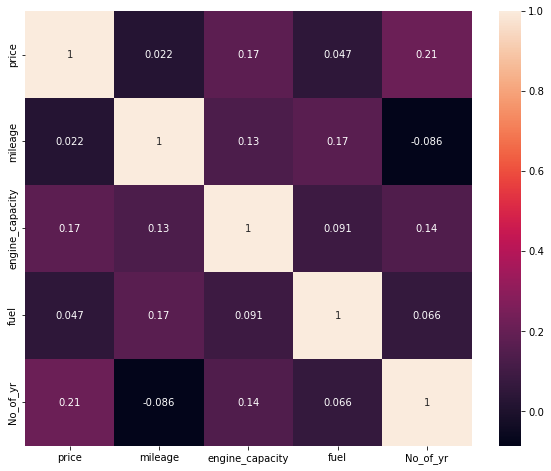

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [27]:
# Checking from above heatmap, showing that all the features are positively correlate with label (Price.)

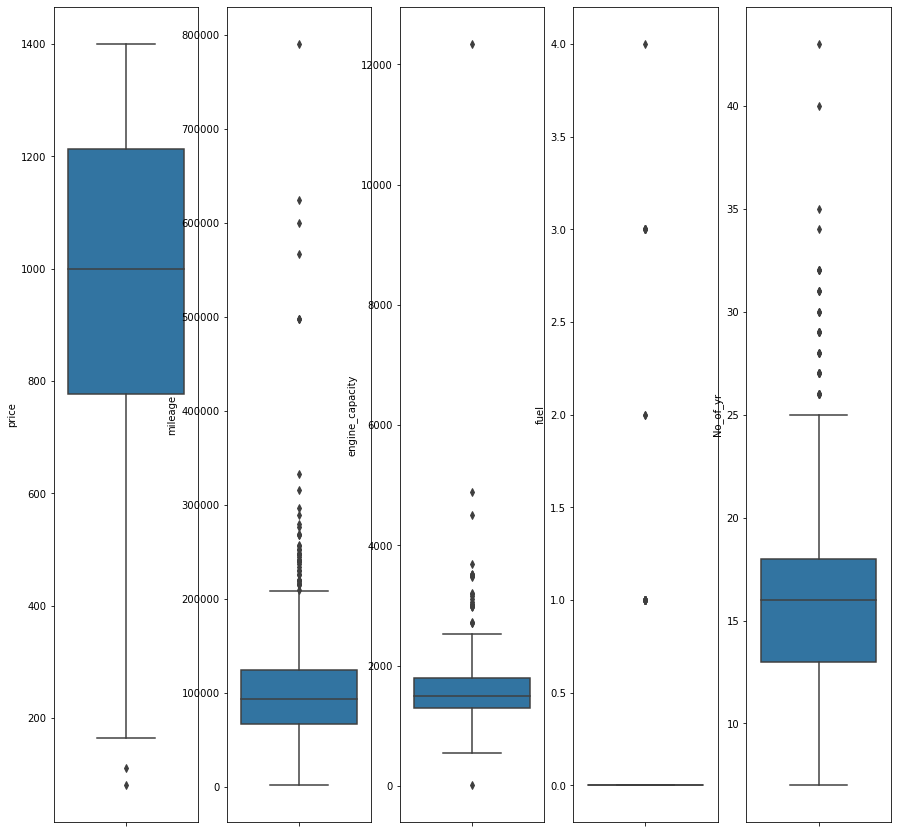

In [28]:
# Checking outliers thru boxplot .
fig, ax = plt.subplots (ncols=5, nrows=1, figsize=(15,15))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1

plt.show()

In [29]:
# Checking from aboe boxplot that outliers are available in every features. will deal with them.

In [30]:
df.shape

(2318, 5)

In [31]:
# find the IQR (Inter Quantile Range) to indentify outliers.

#1st quantile

q1=df.quantile(0.25)

#3rd quantile

q3=df.quantile(0.75)

#IQR

iqr=q3-q1


# Outlier Formula
1. Higher Side==>Q3+(1.5*IQR)
2. Lower Side==>Q1-(1.5*IQR)


In [32]:
# Validating one outlier (for mileage_high column)
mileage_high=(q3.mileage+(1.5*iqr.mileage))
mileage_high

209500.0

In [33]:
# Check the indexes where we found above cell
index=np.where(df['mileage']>mileage_high)
index

(array([  90,  103,  171,  188,  190,  243,  268,  327,  351,  358,  359,
         446,  459,  509,  515,  581,  749,  764,  811,  812,  818,  910,
         971, 1001, 1076, 1134, 1209, 1325, 1382, 1459, 1521, 1572, 1587,
        1609, 1668, 1713, 1729, 1779, 1962, 1975, 2070, 2103, 2147, 2195,
        2210, 2310], dtype=int64),)

In [34]:
# Drop above indexes which we found above milegae high
df=df.drop(df.index[index])
df.shape

(2272, 5)

In [35]:
# reset the index after deleting above index
df.reset_index()

,index,price,mileage,engine_capacity,fuel,No_of_yr
0,0,80,80000,1240,0,19
1,1,110,53000,1200,0,12
2,2,165,47690,2000,0,17
3,3,190,130661,1990,0,14
4,4,190,66300,660,0,16
...,...,...,...,...,...,...
2267,2313,1400,121000,996,0,13
2268,2314,1400,101000,3000,0,19
2269,2315,1400,101000,660,0,17
2270,2316,1400,170000,660,0,22


In [36]:
# Validating outlier (for engine_capacity column)
engine_capacity_=(q3.engine_capacity+(1.5*iqr.engine_capacity))
engine_capacity_

2550.0

In [37]:
# Checking the indexes where we found above cell
index_EC=np.where(df['engine_capacity']>engine_capacity_)
index_EC

(array([   7,   58,  144,  444,  494,  495,  734,  735,  736,  739,  802,
         821,  936,  996, 1020, 1057, 1059, 1229, 1276, 1422, 1460, 1550,
        1635, 1637, 1735, 1775, 1791, 1799, 1904, 1944, 1986, 1997, 2000,
        2001, 2085, 2145, 2168, 2261, 2268, 2271], dtype=int64),)

In [38]:
# Drop above rows from data set.
df=df.drop(df.index[index_EC])
df.shape

(2232, 5)

In [39]:
# Reset the data set after dropping above column.

df.reset_index()

,index,price,mileage,engine_capacity,fuel,No_of_yr
0,0,80,80000,1240,0,19
1,1,110,53000,1200,0,12
2,2,165,47690,2000,0,17
3,3,190,130661,1990,0,14
4,4,190,66300,660,0,16
...,...,...,...,...,...,...
2227,2311,1400,101874,2000,0,17
2228,2312,1400,112000,1300,0,15
2229,2313,1400,121000,996,0,13
2230,2315,1400,101000,660,0,17


In [40]:
# Validating outlier on lower side of engine Capacity
engine_capacity_L=(q1.engine_capacity-(1.5*iqr.engine_capacity))
engine_capacity_L

550.0

In [41]:
# checking the index where we found above cell of 77
index_l=np.where(df['engine_capacity']<engine_capacity_L)
index_l

(array([22], dtype=int64),)

In [42]:
# drop the index found in above cell.
df=df.drop(df.index[index_l])
df.shape

(2231, 5)

In [43]:
# Reset the data set after dropping above column.
df.reset_index()

,index,price,mileage,engine_capacity,fuel,No_of_yr
0,0,80,80000,1240,0,19
1,1,110,53000,1200,0,12
2,2,165,47690,2000,0,17
3,3,190,130661,1990,0,14
4,4,190,66300,660,0,16
...,...,...,...,...,...,...
2226,2311,1400,101874,2000,0,17
2227,2312,1400,112000,1300,0,15
2228,2313,1400,121000,996,0,13
2229,2315,1400,101000,660,0,17


In [44]:
# Validating outlier on fuel column
fuel_high=(q3.fuel+(1.5*iqr.fuel))
fuel_high

0.0

In [45]:
# Checking the index no for above
fuel_index=np.where(df['fuel']>fuel_high)
fuel_index

(array([ 571,  718,  874,  942,  968, 1039, 1049, 1304, 1344, 1426, 1646,
        1917, 1918, 1919, 2054, 2055, 2056, 2181, 2182, 2185], dtype=int64),)

In [46]:
# Drop above indexed from data set.
df=df.drop(df.index[fuel_index])
df.shape

(2211, 5)

In [47]:
# Reset the data set after dropping above column.
df.reset_index()

,index,price,mileage,engine_capacity,fuel,No_of_yr
0,0,80,80000,1240,0,19
1,1,110,53000,1200,0,12
2,2,165,47690,2000,0,17
3,3,190,130661,1990,0,14
4,4,190,66300,660,0,16
...,...,...,...,...,...,...
2206,2311,1400,101874,2000,0,17
2207,2312,1400,112000,1300,0,15
2208,2313,1400,121000,996,0,13
2209,2315,1400,101000,660,0,17


In [48]:
# Validating outlier on No_of_yr column

No_of_yr_high=(q3.No_of_yr +(1.5*iqr.No_of_yr))
No_of_yr_high

25.5

In [49]:
# Checking indexes for above.
No_of_yr_index=np.where(df['No_of_yr']>No_of_yr_high)
No_of_yr_index

(array([ 239,  301,  391,  429,  449,  716,  724,  826,  902, 1042, 1075,
        1078, 1109, 1120, 1121, 1300, 1411, 1512, 1517, 1541, 1566, 1612,
        1633, 1782, 1844, 1863, 1886, 1901, 1947, 2040, 2079, 2174],
       dtype=int64),)

In [50]:
# Dropping above indexes from data set.
df=df.drop(df.index[No_of_yr_index])
df

,price,mileage,engine_capacity,fuel,No_of_yr
0,80,80000,1240,0,19
1,110,53000,1200,0,12
2,165,47690,2000,0,17
3,190,130661,1990,0,14
4,190,66300,660,0,16
...,...,...,...,...,...
2311,1400,101874,2000,0,17
2312,1400,112000,1300,0,15
2313,1400,121000,996,0,13
2315,1400,101000,660,0,17


In [51]:
# Reset the data set after dropping above column.
df.reset_index()

,index,price,mileage,engine_capacity,fuel,No_of_yr
0,0,80,80000,1240,0,19
1,1,110,53000,1200,0,12
2,2,165,47690,2000,0,17
3,3,190,130661,1990,0,14
4,4,190,66300,660,0,16
...,...,...,...,...,...,...
2174,2311,1400,101874,2000,0,17
2175,2312,1400,112000,1300,0,15
2176,2313,1400,121000,996,0,13
2177,2315,1400,101000,660,0,17


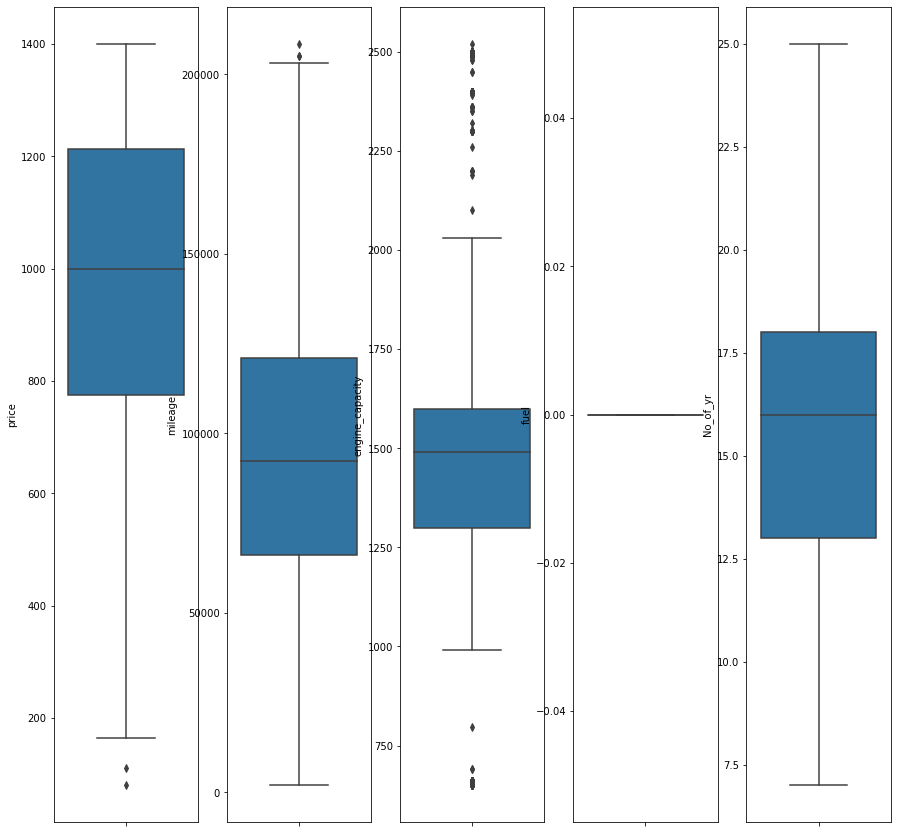

In [52]:
# Checking again outliers thru boxplot .

fig, ax = plt.subplots (ncols=5, nrows=1, figsize=(15,15))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1

plt.show()

# Checking Multicollinearity problem

In [53]:
# seperate features and label, also deleting fuel column.
x=df.drop(['price','fuel'],axis=1)
y=df['price']

In [54]:
# import StandardScaler
from sklearn.preprocessing import StandardScaler

In [55]:
#Intiliazed StandardScaler
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [56]:
x_scaled.shape

(2179, 3)

In [57]:
# Finding VIF(Variance Inflation Factor) in each sclaed column
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['Features']=x.columns
vif

,vif,Features
0,1.019236,mileage
1,1.068758,engine_capacity
2,1.068504,No_of_yr


As the VIF factor is less then 5. so this dataset has no Multicollinearity problem.

# Train Test Split

In [59]:
from sklearn.model_selection import train_test_split

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=321)

In [102]:
#Checking train and test data set shape
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)


(1634, 3)
(1634,)
(545, 3)


In [103]:
# Import Linear regression.
# Although our target variable is price which is continuous in nature. so we are using Linear Regression to predict the label.
from sklearn.linear_model import LinearRegression

In [105]:
#Initialized LinearRegression
lm=LinearRegression()

In [106]:
# Trained the model.
lm.fit(x_train,y_train)

LinearRegression()

In [107]:
# Checking the score (Adjusted R2 Score)
lm.score(x_train,y_train)

0.07759798700220366

In [108]:
# Checking Test Data with Regression model:
lm.score(x_test,y_test)

0.06452031987801377

In [109]:
# Predict the label with our model.
y_pred=lm.predict(x_test)

In [110]:
y_pred

array([ 909.11151302, 1025.43577627,  862.29854246,  938.04760864,
        778.94442376, 1164.38024297,  945.15510027,  918.53341213,
        958.09982255, 1108.80214518,  908.83887453,  893.97597734,
       1027.43015075, 1037.60263125, 1033.79822566, 1126.31366133,
        998.064561  , 1055.59658603, 1074.79590965,  974.02734496,
        931.3753882 ,  849.62327438, 1063.04653891,  878.09556355,
       1006.57455836, 1066.84821028,  927.95330184,  964.97047241,
        766.81215637, 1036.97684446, 1055.95133069, 1154.05894708,
        952.68868876, 1028.80248047, 1079.04937623,  899.56849921,
        899.84217611, 1083.42418665,  901.26115475, 1039.89586951,
        962.0020417 ,  945.15510027,  941.43028133,  910.76175617,
        978.84806048,  918.41158885,  927.12070822, 1032.87411582,
       1121.78292239, 1054.70972438,  920.27911629, 1004.11036087,
        868.48318287, 1162.6660175 ,  973.10041127,  954.9698743 ,
       1032.89742194,  910.82065558,  993.11610388,  904.09911

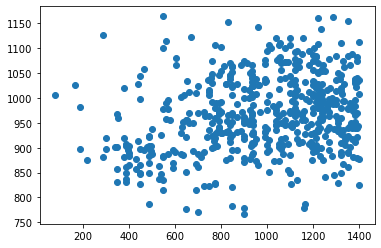

In [93]:
plt.scatter(y_test,y_pred)

# Checking the model with LASSO

In [118]:
from sklearn.linear_model import Ridge, Lasso,RidgeCV,LassoCV

In [119]:
lass_CV=LassoCV(alphas=None,max_iter=100,normalize=True)
lass_CV.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [121]:
# Check best alpha
alpha=lass_CV.alpha_
alpha

0.002316539886988451

In [122]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.002316539886988451)

In [124]:
lasso_reg.score(x_test,y_test)

0.0645197550510257

# Checking the model with Ridge

In [131]:
ridge_CV=RidgeCV(alphas=np.arange(0.0001,0.1,0.01),normalize=True)
ridge_CV.fit(x_train,y_train)

RidgeCV(alphas=array([0.0001, 0.0101, 0.0201, 0.0301, 0.0401, 0.0501, 0.0601, 0.0701,
       0.0801, 0.0901]),
        normalize=True)

In [132]:
ridge_CV.alpha_

0.040100000000000004

In [133]:
ridge_model=Ridge(alpha=ridge_CV.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.040100000000000004)

In [135]:
ridge_model.score(x_test,y_test)

0.06452038940084803

So, we have check all the models are giving same score. so concluded that our model is not overfitted.
